IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


LOADING DATASET

In [5]:
import zipfile
zip_file_path = '/content/customer segmentation.zip'
csv_file_name = 'Shopping Mall Customer Segmentation Data .csv'
with zipfile.ZipFile(zip_file_path, 'r') as zf:
    zf.extract(csv_file_name, path='/content/')
data = pd.read_csv(f'/content/{csv_file_name}')


EXPLORE THE DATA

In [7]:
print(data.head())


                            Customer ID  Age  Gender  Annual Income  \
0  d410ea53-6661-42a9-ad3a-f554b05fd2a7   30    Male         151479   
1  1770b26f-493f-46b6-837f-4237fb5a314e   58  Female         185088   
2  e81aa8eb-1767-4b77-87ce-1620dc732c5e   62  Female          70912   
3  9795712a-ad19-47bf-8886-4f997d6046e3   23    Male          55460   
4  64139426-2226-4cd6-bf09-91bce4b4db5e   24    Male         153752   

   Spending Score  
0              89  
1              95  
2              76  
3              57  
4              76  


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     15079 non-null  object
 1   Age             15079 non-null  int64 
 2   Gender          15079 non-null  object
 3   Annual Income   15079 non-null  int64 
 4   Spending Score  15079 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 589.2+ KB
None


In [9]:
print(data.describe())

                Age  Annual Income  Spending Score
count  15079.000000   15079.000000    15079.000000
mean      54.191591  109742.880562       50.591617
std       21.119207   52249.425866       28.726977
min       18.000000   20022.000000        1.000000
25%       36.000000   64141.000000       26.000000
50%       54.000000  109190.000000       51.000000
75%       72.000000  155008.000000       75.000000
max       90.000000  199974.000000      100.000000


In [10]:
print(data.isnull().sum())

Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64


FEATURE SELECTION

In [13]:
X = data[['Annual Income', 'Spending Score']]

FEATURE SCALING

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ELBOW METHOD

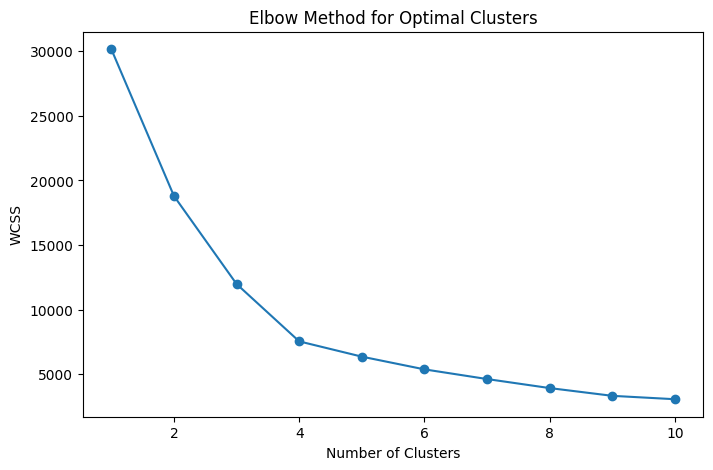

In [22]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

K-MEANS CLUSTERING

In [24]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['Cluster'] = clusters

VISUALIZATION

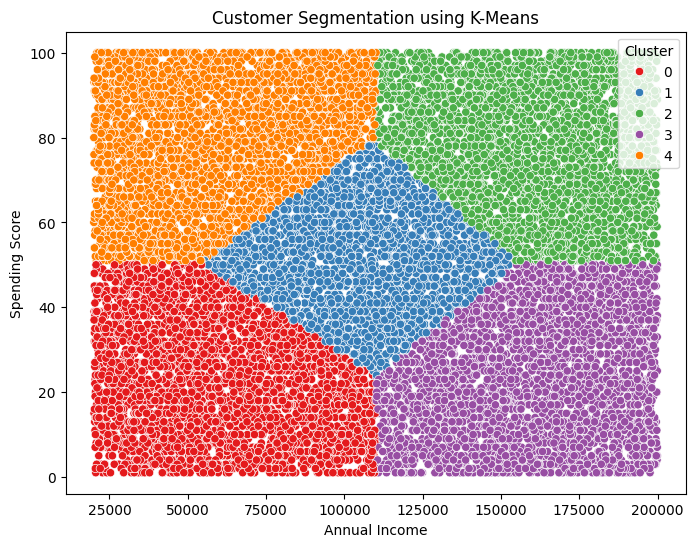

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=data['Annual Income'],
    y=data['Spending Score'],
    hue=data['Cluster'],
    palette='Set1')
plt.title("Customer Segmentation using K-Means")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

CLUSTER INTREPRETATION

In [29]:
cluster_summary = data.groupby('Cluster')[['Annual Income', 'Spending Score']].mean()
print(cluster_summary)

         Annual Income  Spending Score
Cluster                               
0         59520.105559       22.517177
1        106141.212314       51.450955
2        160272.048796       77.745522
3        160515.649688       23.263437
4         58902.720493       78.930285
